1. Carga y Exploración

- pandas → para cargar y manipular los datos.

- matplotlib y seaborn → para visualizaciones gráficas.

- CountVectorizer transforma los textos en una matriz numérica (Bolsa de Palabras).

- train_test_split → divide los datos en entrenamiento y prueba.

- MultinomialNB → clasificador de Naive Bayes Multinomial, ideal para texto.

- accuracy_score, confusion_matrix, classification_report → Métricas para evaluar el modelo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Se carga el archivo Tweets.csv en un DataFrame de Pandas.

In [4]:
#Carga de Datos
tweets_df = pd.read_csv("Tweets.csv")

- Se seleccionan solo las columnas necesarias: el texto del tweet y el sentimiento.

- .dropna() elimina registros vacíos (si los hubiera).

In [7]:
#Seleccionar Columnas Relevantes
tweets_df = tweets_df[["text", "airline_sentiment"]].dropna()

- Se genera un gráfico de barras mostrando la cantidad de tweets en cada categoría de sentimiento (negative, neutral, positive).

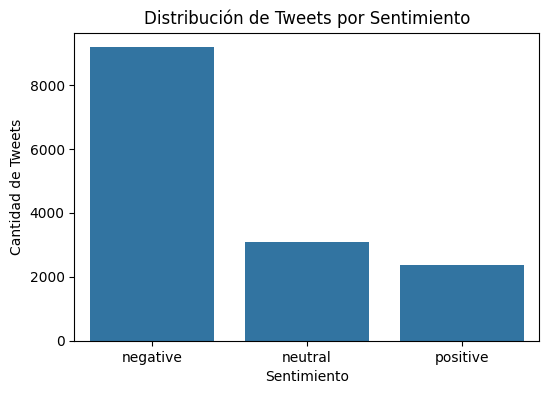

In [8]:
#Visualización de tweets por sentimiento
plt.figure(figsize=(6,4))
sns.countplot(
    data=tweets_df,
    x="airline_sentiment",
    order=tweets_df["airline_sentiment"].value_counts().index
)
plt.title("Distribución de Tweets por Sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Tweets")
plt.show()

2. Preparación y Vectorización

- X contiene los textos de los tweets.

- y contiene las etiquetas de sentimiento.

In [9]:
#Definición de columnas
X = tweets_df["text"]
y = tweets_df["airline_sentiment"]

- Se eliminan stopwords (palabras muy comunes que no aportan significado, como “the”, “is”, etc.).

- fit_transform() crea la matriz numérica: cada fila es un tweet y cada columna una palabra.

In [10]:
#Bolsa de Palabras
vectorizer = CountVectorizer(stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

3. **División y Entrenamiento**

- test_size=0.2 → 20% de datos para prueba y 80% para entrenamiento.

- random_state=42 → asegura que la división sea siempre la misma (reproducible).

- stratify=y → mantiene la proporción de clases igual en train y test.

In [12]:
#División de Sets (Entrenamiento y Prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42, stratify=y
)

- Se entrena el modelo Naive Bayes con los datos de entrenamiento.

In [13]:
#Entrenamiento
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

4. **Evaluación**

- El modelo predice los sentimientos para los datos de prueba.

In [14]:
#Predicción
y_pred = model.predict(X_test)

- accuracy → porcentaje de predicciones correctas.

In [15]:
#Precisión
accuracy = accuracy_score(y_test, y_pred)

- conf_matrix → muestra cuántos tweets de cada clase fueron clasificados correctamente o mal.

In [16]:
#Matríz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=["negative","neutral","positive"])

- Se imprime el rendimiento del modelo: exactitud, métricas de precisión/recall por clase y matriz de confusión.

In [36]:
#Impresión del Modelo
print(f"Accuracy: {accuracy:.0%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 76%

Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.94      0.85      1835
     neutral       0.65      0.41      0.51       620
    positive       0.73      0.54      0.62       473

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928



<Axes: >

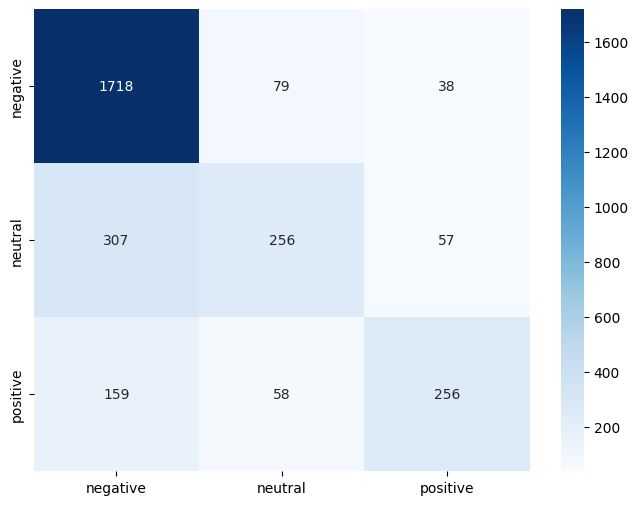

In [24]:
#Visualización de la Matríz de Confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["negative","neutral","positive"], yticklabels=["negative","neutral","positive"])


5. **Conclusión**

- El modelo alcanzó una precisión del **76%**.

- Identifica muy bien los tweets negativos (clase mayoritaria).

- Confunde más entre neutros y positivos.

- Mejoras posibles:
1.   TF-IDF Vectorizer en lugar de CountVectorizer.
2.   Modelos más complejos (Logistic Regression, Random Forest o Redes Neuronales).
3. Limpieza más profunda de los textos (lematización, stemming, emojis, hashtags, etc.).

